In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#import mpld3
%matplotlib inline 
from USGS_functions import drop_constant_cols, fix_timezones, merge_scale_delete, outlier_std
from IPython.display import display, HTML
from pandas_summary import DataFrameSummary     # describe function extension
import itertools

%config InlineBackend.figure_format = 'png'

from ipywidgets import widgets

pd.options.mode.chained_assignment = None  # default='warn'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Correlation Analysis
Correlation analysis was performed on the auxilary using the same method and formula, shown below, devloped for the VU reported data.

\begin{equation}
    2\frac{-\sqrt{|mag1-mag2|}}{\sqrt{2}}+1
\end{equation}

Only data from 2016 on is considered for this analysis.

In [3]:
df = pd.read_pickle('characteristics')     # import data exported from import and clean notebook
df.reset_index(inplace=True)               # remove multi-index
df = df[df.dateTime >= datetime(2016,1,1)] # pull out only data after 1/1/2016

In [12]:
df_pct = df.iloc[:,2:]._get_numeric_data().pct_change()

In [35]:
correlation = df_pct.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
display(correlation)

CharacteristicName,Barometric pressure [mm/Hg],Escherichia coli [#/100ml],Flow [m3/sec],Nitrate [mg/l],Sulfate [mg/l],"Temperature, water [deg C]",Total suspended solids [mg/l],Turbidity [NTU],Wind velocity [m/sec],pH [None]
CharacteristicName,,,,,,,,,,
Barometric pressure [mm/Hg],1.000000,NaN,NaN,0.157626,0.031533,-0.157871,NaN,0.023776,0.149886,0.046528
Escherichia coli [#/100ml],NaN,1.000000,0.313105,0.281905,-0.051712,0.098299,0.066309,0.105650,NaN,-0.076270
Flow [m3/sec],NaN,0.313105,1.000000,0.086893,NaN,0.025567,-0.123884,0.100744,NaN,0.000854
Nitrate [mg/l],0.157626,0.281905,0.086893,1.000000,-0.236532,0.530677,NaN,0.091008,0.064702,-0.214191
Sulfate [mg/l],0.031533,-0.051712,NaN,-0.236532,1.000000,-0.014508,-0.124818,-0.092680,-0.625644,0.116149
"Temperature, water [deg C]",-0.157871,0.098299,0.025567,0.530677,-0.014508,1.000000,0.014737,0.028293,0.217219,-0.014043
Total suspended solids [mg/l],NaN,0.066309,-0.123884,NaN,-0.124818,0.014737,1.000000,0.454682,NaN,-0.142000
Turbidity [NTU],0.023776,0.105650,0.100744,0.091008,-0.092680,0.028293,0.454682,1.000000,0.240995,-0.119055
Wind velocity [m/sec],0.149886,NaN,NaN,0.064702,-0.625644,0.217219,NaN,0.240995,1.000000,0.469509


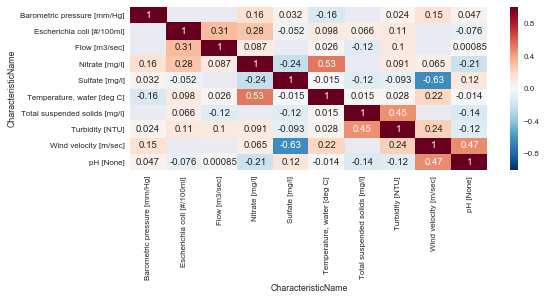

In [34]:
sns.set()
sns.set_context("paper")
plt.figure(figsize=(8,3))
sns.heatmap(correlation, annot=True)
#plt.savefig('heatmap.eps')
#plt.savefig('heatmap.png', dpi=400)

In [70]:
correlation_modified = pd.DataFrame(index = df_pct.columns, columns = df_pct.columns)
for (i,j) in itertools.combinations_with_replacement(range(0,len(df_pct.columns)),2):
    diff1 = df_pct.iloc[:,i]
    name1 = df_pct.iloc[:,(i,j)].columns[0]
    diff2 = df_pct.iloc[:,j]
    name2 = df_pct.iloc[:,(i,j)].columns[1]
    result = 2*(-np.sqrt(np.abs(diff1-diff2))/np.sqrt(2)) + 1
    correlation_modified.loc[name1,name2] = result.mean()
    correlation_modified.loc[name2,name1] = result.mean()
    print(name1,name2)
    #result = 
#    if len(df.iloc[:,(i,j)].dropna()) > 1000:
#        sns.lmplot(df.iloc[:,(i,j)].columns.values[0],df.iloc[:,(i,j)].columns.values[1], df)
#        print(df.iloc[:,(i,j)].columns.values)
#        print(len(df.iloc[:,(i,j)].dropna()))
correlation_modified.replace([np.inf, -np.inf], np.nan, inplace=True)

Barometric pressure [mm/Hg] Barometric pressure [mm/Hg]
Barometric pressure [mm/Hg] Chlorine [mg/l]
Barometric pressure [mm/Hg] Conductivity [uS/cm]
Barometric pressure [mm/Hg] Depth [m]
Barometric pressure [mm/Hg] Escherichia coli [#/100ml]
Barometric pressure [mm/Hg] Flow [m3/sec]
Barometric pressure [mm/Hg] Nitrate [mg/l]
Barometric pressure [mm/Hg] Precipitation [in/week]
Barometric pressure [mm/Hg] Sulfate [mg/l]
Barometric pressure [mm/Hg] Temperature, air [deg C]
Barometric pressure [mm/Hg] Temperature, water [deg C]
Barometric pressure [mm/Hg] Total suspended solids [mg/l]
Barometric pressure [mm/Hg] Turbidity [NTU]
Barometric pressure [mm/Hg] Wind direction [deg]
Barometric pressure [mm/Hg] Wind velocity [m/sec]
Barometric pressure [mm/Hg] pH [None]
Chlorine [mg/l] Chlorine [mg/l]
Chlorine [mg/l] Conductivity [uS/cm]
Chlorine [mg/l] Depth [m]
Chlorine [mg/l] Escherichia coli [#/100ml]
Chlorine [mg/l] Flow [m3/sec]
Chlorine [mg/l] Nitrate [mg/l]
Chlorine [mg/l] Precipitation [i

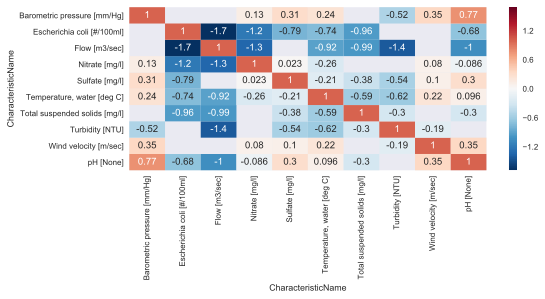

In [77]:
correlation_modified = correlation_modified.dropna(how='all', axis=0).dropna(how='all', axis=1)
sns.set()
sns.set_context("paper")
plt.figure(figsize=(8,3))
sns.heatmap(correlation_modified, annot=True)
plt.savefig('heatmap1.eps', bbox_inches = 'tight')
plt.savefig('heatmap1.png', dpi=400, bbox_inches = 'tight')

In [68]:
correlation_modified.replace([np.inf, -np.inf], np.nan, inplace=True)

CharacteristicName,Barometric pressure [mm/Hg],Escherichia coli [#/100ml],Flow [m3/sec],Nitrate [mg/l],Sulfate [mg/l],"Temperature, water [deg C]",Total suspended solids [mg/l],Turbidity [NTU],Wind velocity [m/sec],pH [None]
CharacteristicName,,,,,,,,,,
Barometric pressure [mm/Hg],1.000000,NaN,NaN,0.129960,0.306242,0.241560,NaN,-0.520826,0.347952,0.768710
Escherichia coli [#/100ml],NaN,1.000000,-1.686463,-1.205309,-0.785413,-0.735123,-0.956642,NaN,NaN,-0.680481
Flow [m3/sec],NaN,-1.686463,1.000000,-1.342195,NaN,-0.919103,-0.985153,-1.420206,NaN,-1.046254
Nitrate [mg/l],0.129960,-1.205309,-1.342195,1.000000,0.022586,-0.255528,NaN,NaN,0.080203,-0.086209
Sulfate [mg/l],0.306242,-0.785413,NaN,0.022586,1.000000,-0.209909,-0.375040,-0.541399,0.102879,0.300246
"Temperature, water [deg C]",0.241560,-0.735123,-0.919103,-0.255528,-0.209909,1.000000,-0.593133,-0.617699,0.220486,0.095637
Total suspended solids [mg/l],NaN,-0.956642,-0.985153,NaN,-0.375040,-0.593133,1.000000,-0.297359,NaN,-0.297521
Turbidity [NTU],-0.520826,NaN,-1.420206,NaN,-0.541399,-0.617699,-0.297359,1.000000,-0.194370,NaN
Wind velocity [m/sec],0.347952,NaN,NaN,0.080203,0.102879,0.220486,NaN,-0.194370,1.000000,0.352158
